# ASSIGNMENT 4

#####  NAME: RISHAV KUMAR
#####  ROLL NO. 2301560042

My github account link : [Github](https://github.com/risav68111/AIML_Assignment)


# Question 1

Dataset link: [LINK](https://www.kaggle.com/datasets/adeolaadesina/factors-affecting-children-anemia-level)

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [181]:
df= pd.read_csv(r'C:\Users\risha\Documents\KRMU\AIML_assigment\datasets\children_anemia.csv')

In [182]:
df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [183]:
 df.isna().sum()

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level                                                             20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                            

In [184]:
df.shape

(33924, 17)

In [185]:
df.duplicated().sum()

4678

In [186]:
df=df.drop_duplicates()

In [187]:
df.columns

Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Smokes cigarettes', 'Current marital status',
       'Currently residing with husband/partner', 'When child put to breast',
       'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Anemia level.1', 'Taking iron pills, sprinkles or syrup'],
      dtype='object')

In [188]:
df['Anemia level.1']

0               NaN
1               NaN
2               NaN
3        Not anemic
4               NaN
            ...    
33919    Not anemic
33920    Not anemic
33921    Not anemic
33922      Moderate
33923           NaN
Name: Anemia level.1, Length: 29246, dtype: object

In [189]:
df.dropna(subset=['Anemia level.1'], inplace=True)

In [190]:
df.reset_index(drop=True, inplace=True)

In [191]:
df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
1,30-34,Urban,Higher,Richest,1,30,113.0,Mild,Yes,No,Married,Living with her,NaN,No,119.0,Not anemic,No
2,35-39,Urban,Secondary,Richest,2,32,121.0,Not anemic,Yes,No,Married,Living with her,Immediately,No,102.0,Mild,Yes
3,20-24,Urban,Secondary,Richest,1,19,108.0,Moderate,Yes,No,Married,Living with her,Immediately,No,113.0,Not anemic,Yes
4,25-29,Urban,Higher,Richest,1,24,116.0,Mild,Yes,No,Married,Living with her,Days: 1,No,109.0,Mild,No


In [192]:
df.shape

(10171, 17)

In [193]:
df.isna().sum()

Age in 5-year groups                                                        0
Type of place of residence                                                  0
Highest educational level                                                   0
Wealth index combined                                                       0
Births in last five years                                                   0
Age of respondent at 1st birth                                              0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)     120
Anemia level                                                              120
Have mosquito bed net for sleeping (from household questionnaire)           0
Smokes cigarettes                                                           0
Current marital status                                                      0
Currently residing with husband/partner                                   518
When child put to breast                                        

In [194]:
hemo_level_adjusted = df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)']
hemo_level_adjusted

0         95.0
1        113.0
2        121.0
3        108.0
4        116.0
         ...  
10166    120.0
10167    120.0
10168    120.0
10169    149.0
10170    123.0
Name: Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal), Length: 10171, dtype: float64

In [195]:
hemo_level_adjusted.isna().sum()

120

In [196]:
hemo_level_adjusted.var()

247.79435994834301

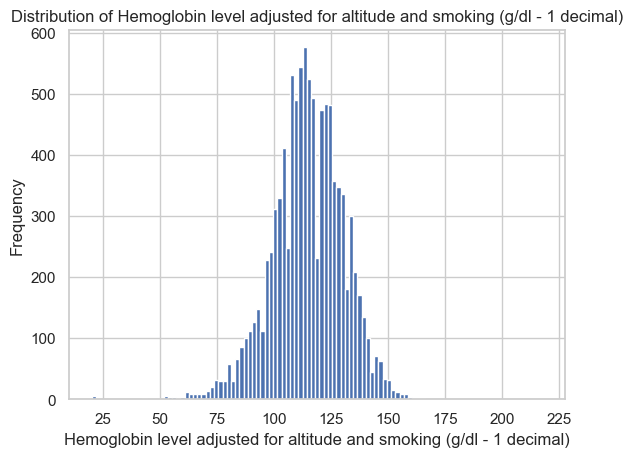

In [197]:
plt.hist(df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'], bins='auto')
plt.title('Distribution of Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)')
plt.xlabel('Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)')
plt.ylabel('Frequency')
plt.show()

In [198]:


hemo_level_adjusted.fillna(hemo_level_adjusted.mean(), inplace=True)

In [199]:
df.drop(columns=['Currently residing with husband/partner','Anemia level'],inplace=True)

In [200]:
breast_feed = df['When child put to breast']
breast_feed

0              105.0
1                NaN
2        Immediately
3        Immediately
4            Days: 1
            ...     
10166    Immediately
10167            NaN
10168       Hours: 1
10169       Hours: 1
10170    Immediately
Name: When child put to breast, Length: 10171, dtype: object

In [201]:
breast_feed.unique()

array(['105.0', nan, 'Immediately', 'Days: 1', 'Hours: 1', '103.0',
       '203.0', '102.0', '111.0', '106.0', '104.0', '202.0', '107.0',
       '108.0', '120.0', '123.0', '110.0', '112.0', '207.0', '109.0',
       '113.0', '205.0', '115.0', '117.0', '212.0', '114.0', '204.0',
       '119.0', '211.0', '121.0', '214.0', '206.0', '118.0', '210.0',
       '208.0', '116.0', '223.0', '220.0'], dtype=object)

In [202]:
breast_feed.shape

(10171,)

In [203]:
breast_feed.isna().sum()


3806

In [204]:
df.drop(columns='When child put to breast',inplace=True)

In [205]:
df.isna().sum()

Age in 5-year groups                                                     0
Type of place of residence                                               0
Highest educational level                                                0
Wealth index combined                                                    0
Births in last five years                                                0
Age of respondent at 1st birth                                           0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    0
Have mosquito bed net for sleeping (from household questionnaire)        0
Smokes cigarettes                                                        0
Current marital status                                                   0
Had fever in last two weeks                                              0
Hemoglobin level adjusted for altitude (g/dl - 1 decimal)                0
Anemia level.1                                                           0
Taking iron pills, sprink

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10171 entries, 0 to 10170
Data columns (total 14 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   10171 non-null  object 
 1   Type of place of residence                                             10171 non-null  object 
 2   Highest educational level                                              10171 non-null  object 
 3   Wealth index combined                                                  10171 non-null  object 
 4   Births in last five years                                              10171 non-null  int64  
 5   Age of respondent at 1st birth                                         10171 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  10171 non-null 

Separating Dependent And Independent Variables

In [207]:
y = df['Anemia level.1']
x = df.drop(columns='Anemia level.1',axis=1)

In [208]:
x.shape

(10171, 13)

In [209]:
y

0        Not anemic
1        Not anemic
2              Mild
3        Not anemic
4              Mild
            ...    
10166          Mild
10167    Not anemic
10168    Not anemic
10169    Not anemic
10170      Moderate
Name: Anemia level.1, Length: 10171, dtype: object

Visualizing the Data 

In [210]:
y.unique()

array(['Not anemic', 'Mild', 'Moderate', 'Severe'], dtype=object)

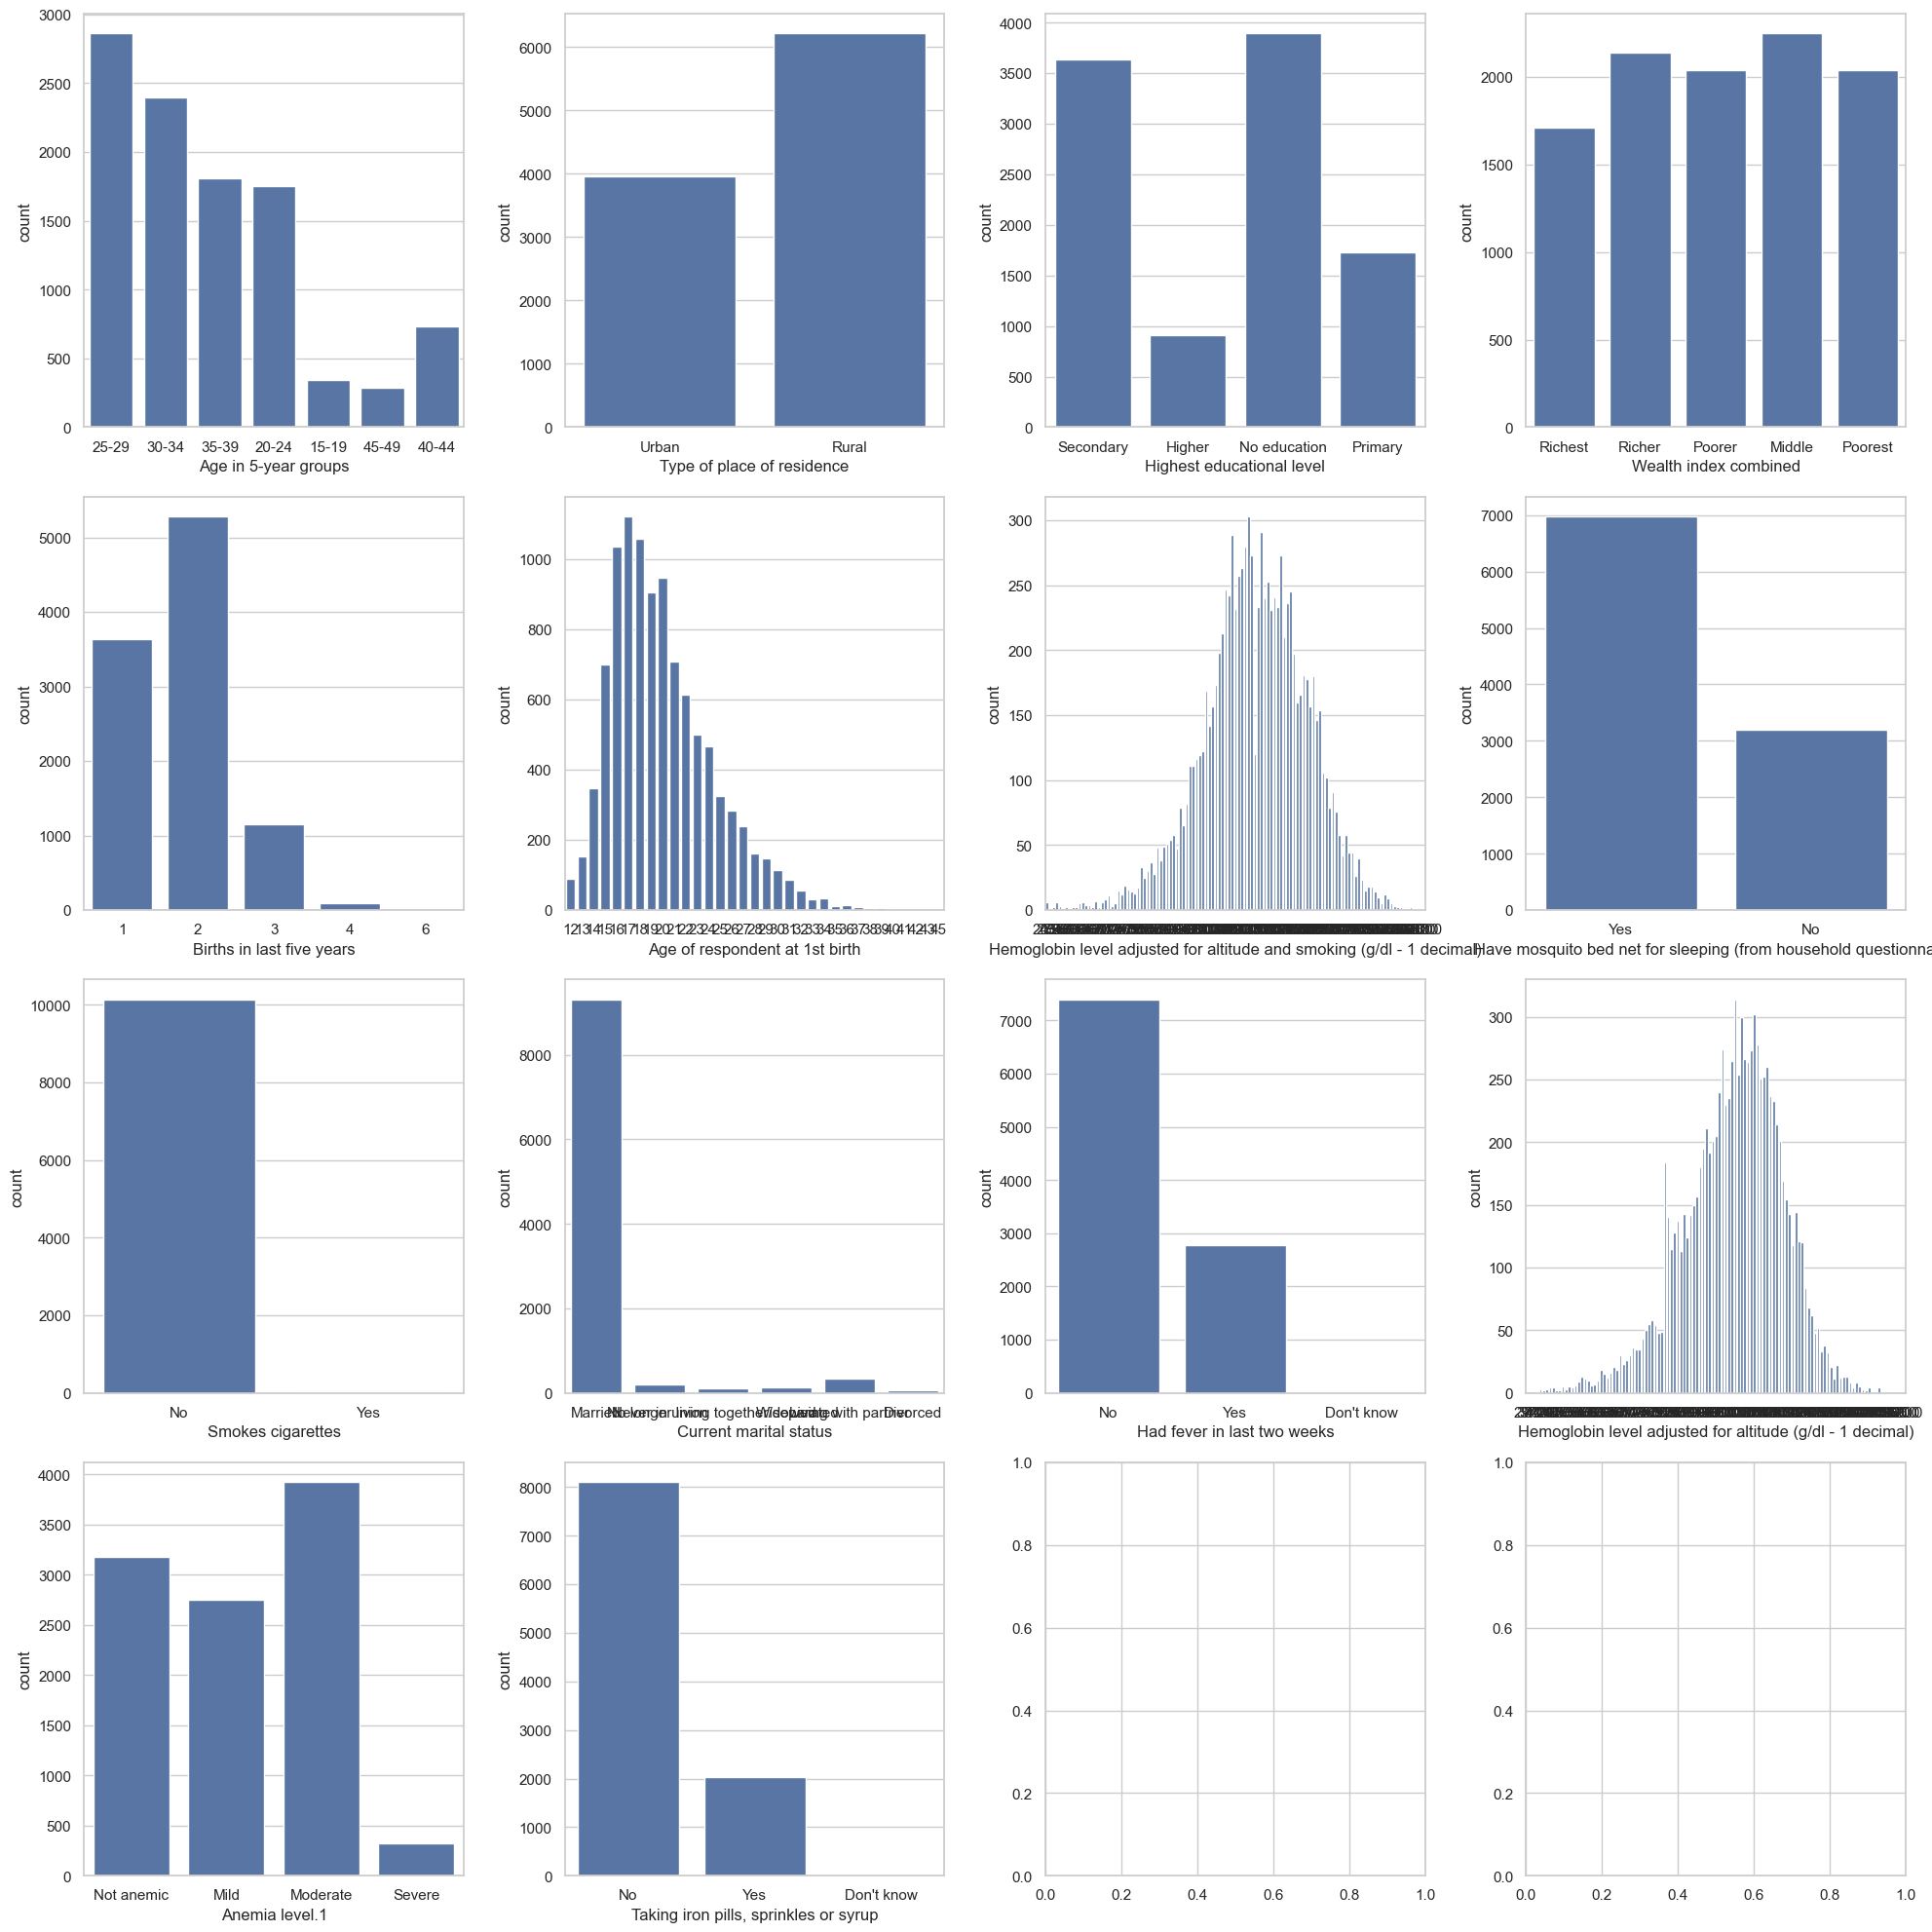

In [211]:
count=0
fig, ax=plt.subplots(4,4,figsize=(20,20))
ax=ax.flatten()
for i in df.columns:
    sns.countplot(df,x=i,ax=ax[count])
    count+=1
plt.tight_layout()

In [212]:
x['Age in 5-year groups'].unique()

array(['25-29', '30-34', '35-39', '20-24', '15-19', '45-49', '40-44'],
      dtype=object)

In [213]:
x['Age in 5-year groups'] = x['Age in 5-year groups'].apply(lambda x: sum(map(int, x.split('-'))) / 2 if isinstance(x, str) else x)


In [214]:
x

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),"Taking iron pills, sprinkles or syrup"
0,27.0,Urban,Secondary,Richest,1,25,95.0,Yes,No,Married,No,114.0,No
1,32.0,Urban,Higher,Richest,1,30,113.0,Yes,No,Married,No,119.0,No
2,37.0,Urban,Secondary,Richest,2,32,121.0,Yes,No,Married,No,102.0,Yes
3,22.0,Urban,Secondary,Richest,1,19,108.0,Yes,No,Married,No,113.0,Yes
4,27.0,Urban,Higher,Richest,1,24,116.0,Yes,No,Married,No,109.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10166,37.0,Rural,Secondary,Richer,2,19,120.0,Yes,No,Married,No,108.0,Yes
10167,37.0,Rural,Secondary,Richer,2,19,120.0,Yes,No,Married,No,120.0,Yes
10168,27.0,Rural,No education,Richer,1,27,120.0,Yes,No,Never in union,No,120.0,No
10169,27.0,Rural,Higher,Richer,1,22,149.0,Yes,No,Married,No,119.0,No


In [215]:
x['Age in 5-year groups'].dtype

dtype('float64')

In [216]:
x['Type of place of residence'].unique()

array(['Urban', 'Rural'], dtype=object)

<Axes: xlabel='Type of place of residence'>

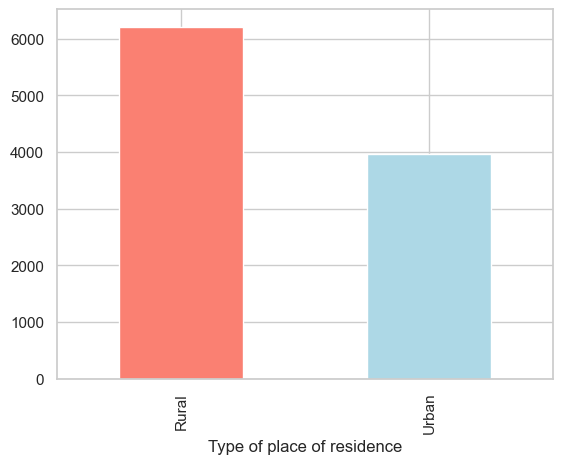

In [217]:
x['Type of place of residence'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [218]:
def plotter(x,y,title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.countplot(x=x, hue=y,palette="Set2")

    plt.title(title)
    plt.xlabel('Having Anemia')
    plt.ylabel('Count')
    
    plt.show()
    return


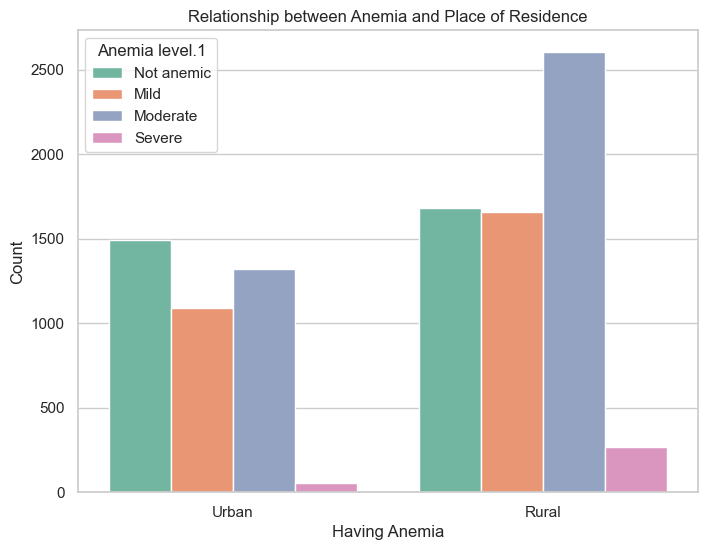

In [219]:
plotter(x['Type of place of residence'],y,'Relationship between Anemia and Place of Residence')

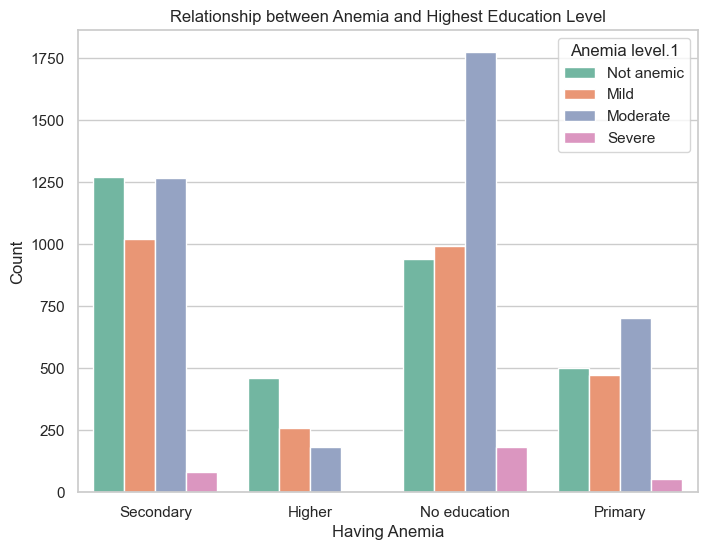

In [220]:
plotter(x['Highest educational level'],y,'Relationship between Anemia and Highest Education Level')

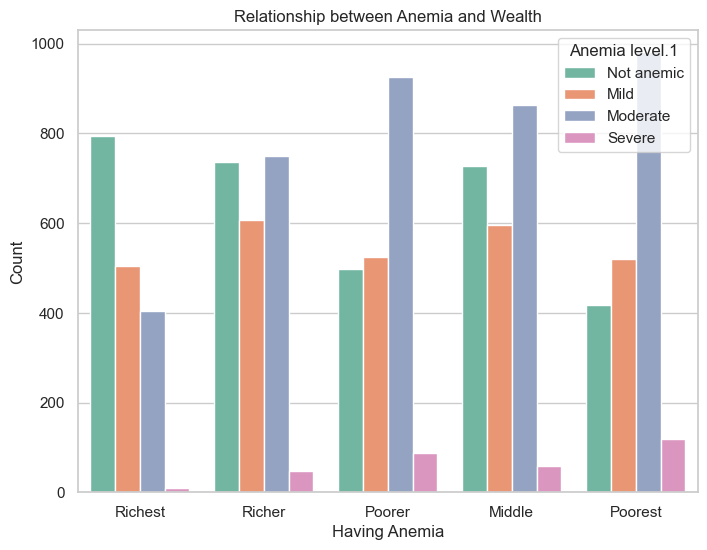

In [221]:
plotter(x['Wealth index combined'],y,'Relationship between Anemia and Wealth')

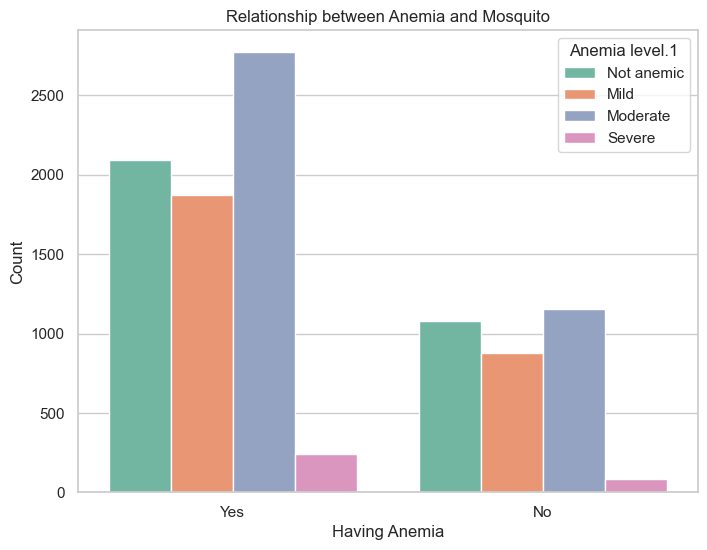

In [222]:
plotter(x['Have mosquito bed net for sleeping (from household questionnaire)'],y,'Relationship between Anemia and Mosquito')

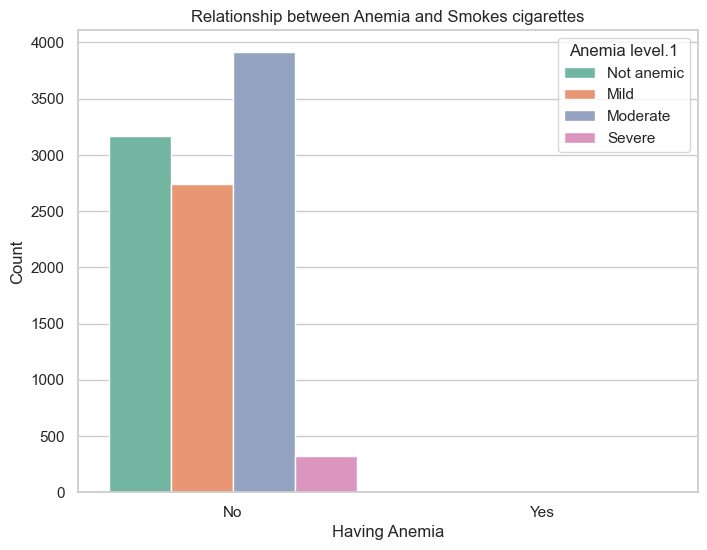

In [223]:
plotter(x['Smokes cigarettes'],y,'Relationship between Anemia and Smokes cigarettes')

In [224]:
x['Smokes cigarettes'].unique()

array(['No', 'Yes'], dtype=object)

In [225]:
x['Smokes cigarettes'].value_counts()

Smokes cigarettes
No     10147
Yes       24
Name: count, dtype: int64

I think smoking cigarettes doesn't affect having Anemia or not , so let's drop that column

In [226]:
x.drop(columns='Smokes cigarettes',axis=1,inplace=True)

In [227]:
x.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Have mosquito bed net for sleeping (from household questionnaire),Current marital status,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),"Taking iron pills, sprinkles or syrup"
0,27.0,Urban,Secondary,Richest,1,25,95.0,Yes,Married,No,114.0,No
1,32.0,Urban,Higher,Richest,1,30,113.0,Yes,Married,No,119.0,No
2,37.0,Urban,Secondary,Richest,2,32,121.0,Yes,Married,No,102.0,Yes
3,22.0,Urban,Secondary,Richest,1,19,108.0,Yes,Married,No,113.0,Yes
4,27.0,Urban,Higher,Richest,1,24,116.0,Yes,Married,No,109.0,No


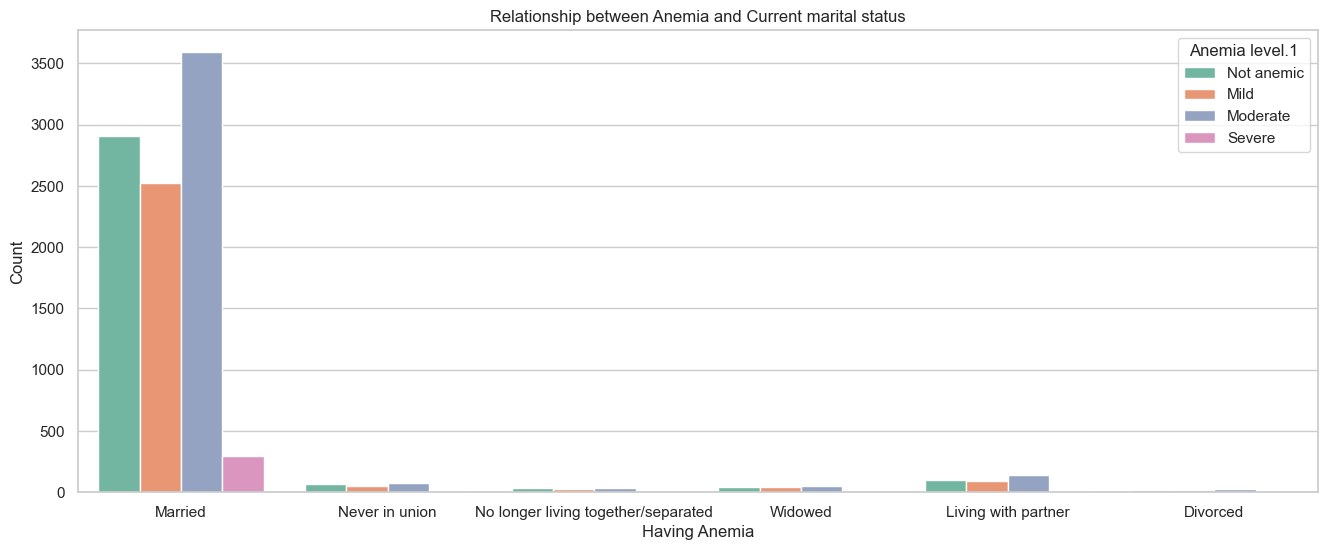

In [228]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
sns.countplot(x=x['Current marital status'], hue=y,palette="Set2")

plt.title("Relationship between Anemia and Current marital status")
plt.xlabel('Having Anemia')
plt.ylabel('Count')

plt.show()

I think Current marital status doesn't affect having Anemia or not , so let's drop that column

In [229]:
x.drop(columns='Current marital status',axis=1,inplace=True)

In [230]:
x.columns

Index(['Age in 5-year groups', 'Type of place of residence',
       'Highest educational level', 'Wealth index combined',
       'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)',
       'Have mosquito bed net for sleeping (from household questionnaire)',
       'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)',
       'Taking iron pills, sprinkles or syrup'],
      dtype='object')

In [231]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10171 entries, 0 to 10170
Data columns (total 11 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age in 5-year groups                                                   10171 non-null  float64
 1   Type of place of residence                                             10171 non-null  object 
 2   Highest educational level                                              10171 non-null  object 
 3   Wealth index combined                                                  10171 non-null  object 
 4   Births in last five years                                              10171 non-null  int64  
 5   Age of respondent at 1st birth                                         10171 non-null  int64  
 6   Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)  10171 non-null 

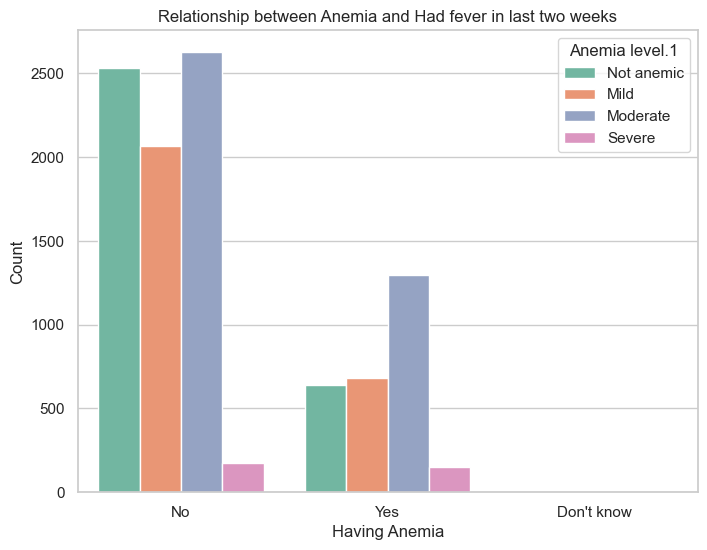

In [232]:
plotter(x['Had fever in last two weeks'],y,'Relationship between Anemia and Had fever in last two weeks')

convert our catergorical data to numerical using one hot encoding

In [233]:
x= x.iloc[:,:].values
x

array([[27.0, 'Urban', 'Secondary', ..., 'No', 114.0, 'No'],
       [32.0, 'Urban', 'Higher', ..., 'No', 119.0, 'No'],
       [37.0, 'Urban', 'Secondary', ..., 'No', 102.0, 'Yes'],
       ...,
       [27.0, 'Rural', 'No education', ..., 'No', 120.0, 'No'],
       [27.0, 'Rural', 'Higher', ..., 'No', 119.0, 'No'],
       [22.0, 'Rural', 'Secondary', ..., 'No', 75.0, 'Yes']], dtype=object)

In [234]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2,3,7,8,10])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [235]:
x

array([[0.0, 1.0, 0.0, ..., 25, 95.0, 114.0],
       [0.0, 1.0, 1.0, ..., 30, 113.0, 119.0],
       [0.0, 1.0, 0.0, ..., 32, 121.0, 102.0],
       ...,
       [1.0, 0.0, 0.0, ..., 27, 120.0, 120.0],
       [1.0, 0.0, 1.0, ..., 22, 149.0, 119.0],
       [1.0, 0.0, 0.0, ..., 21, 123.0, 75.0]], dtype=object)

let's convert our dependant categroical data into numerical data

In [236]:
le = LabelEncoder()
y = np.array(le.fit_transform(y))
y

array([2, 2, 0, ..., 2, 2, 1])

In [237]:
np.unique(y)

array([0, 1, 2, 3])

In [238]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,x_test.shape

((8136, 24), (2035, 24))

In [239]:
y_train.shape,y_test.shape

((8136,), (2035,))

In [240]:
sc = StandardScaler()

x_train[:,[-1,-2,-3]] = sc.fit_transform(x_train[:,[-1,-2,-3]])
x_test[:,[-1,-2,-3]] = sc.fit_transform(x_test[:,[-1,-2,-3]])
x_train


array([[1.0, 0.0, 0.0, ..., -1.3459967100539345, 1.3040544531398048,
        -0.08824165576283671],
       [1.0, 0.0, 0.0, ..., -1.7976134794623027, 0.019326375584944898,
        1.971827530137993],
       [1.0, 0.0, 0.0, ..., -0.21695478653301434, 0.661690414362375,
        2.0362046921973938],
       ...,
       [1.0, 0.0, 0.0, ..., -1.1201883253497504, 1.3040544531398048,
        -0.08824165576283671],
       [0.0, 1.0, 0.0, ..., 0.23466198287535373, 1.689472876406263,
        1.7786960439597903],
       [1.0, 0.0, 0.0, ..., 0.23466198287535373, -1.265401701969915,
        -0.7963904384162469]], dtype=object)

In [241]:
le = LabelEncoder()
y = np.array(le.fit_transform(y))
y

array([2, 2, 0, ..., 2, 2, 1], dtype=int64)

In [242]:
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,X_test.shape,y_train.shape,y_test.shape

((8136, 24), (2035, 24), (8136,), (2035,))

In [243]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(n_neighbors=5),
          "Random Forest": RandomForestClassifier(n_estimators=100,criterion='entropy'),
          "Kernel SVM" : SVC(kernel='rbf',random_state=0),
          "Support Vector" : SVC(kernel='linear',random_state=0),
          "Naive Based" :GaussianNB(),
          "Decision Tree" :  DecisionTreeClassifier(criterion='entropy',random_state=0)
         }


In [244]:

def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    accuracy_scores = {}

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores[name] = accuracy_score(y_test,y_pred)
    return accuracy_scores

In [245]:
model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

model_scores

c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.6314496314496314,
 'KNN': 0.9611793611793612,
 'Random Forest': 0.9960687960687961,
 'Kernel SVM': 0.972972972972973,
 'Support Vector': 1.0,
 'Naive Based': 0.8088452088452088,
 'Decision Tree': 1.0}

<Axes: >

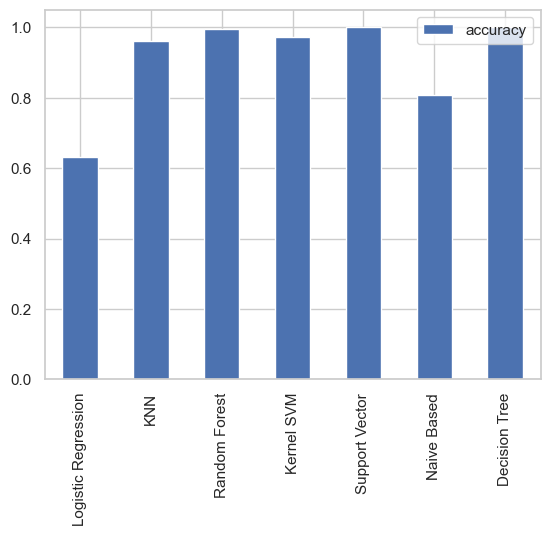

In [246]:
model_comp = pd.DataFrame(model_scores, index=["accuracy"])
model_comp.T.plot.bar()

Finding Model with highest accuracy score

In [247]:
best_model = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model]
best_model,best_score

('Support Vector', 1.0)

In [248]:
classifier =  DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [249]:
y_preds = classifier.predict(x_test)

In [250]:
accuracy = accuracy_score(y_test,y_preds)
accuracy

0.03783783783783784

Confusion metrix

In [251]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test, y_preds))

[[  0   0   0 556]
 [  0   0   0 798]
 [  0   0   0 604]
 [  0   0   0  77]]


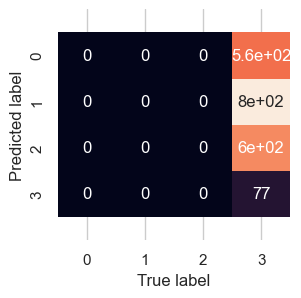

In [252]:
def plot_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [253]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       556
           1       0.00      0.00      0.00       798
           2       0.00      0.00      0.00       604
           3       0.04      1.00      0.07        77

    accuracy                           0.04      2035
   macro avg       0.01      0.25      0.02      2035
weighted avg       0.00      0.04      0.00      2035



c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [254]:
from collections import Counter
Counter(y_train)
Counter(y_test)

Counter({1: 798, 2: 604, 0: 556, 3: 77})